In [1]:
%load_ext autoreload
%autoreload 2

from src import loading, metrics, modeling, preprocessing, resampling, evaluation

## Loading data

In [2]:
df = loading.load_data()

## Preprocessing

In [3]:
df_preprocess = preprocessing.preprocess_data(df)

## Preparing data for ML models

In [4]:
X_train, X_val, y_train, y_val = preprocessing.split(df_preprocess)

## Training model

In [6]:
modeling.fit_model(X_train,y_train)

/opt/homebrew/Caskroom/miniforge/base/envs/ML/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Evaluating saved model

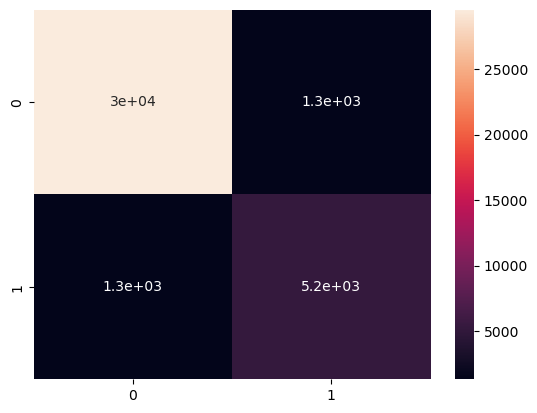

In [14]:
model = modeling.load_model()
evaluation.evaluate_model(model,X_val,y_val)